In [8]:
!pip install ucimlrepo

In [9]:
from ucimlrepo import fetch_ucirepo

wine = fetch_ucirepo(id=186)
X = wine.data.features
y = wine.data.targets



Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.7045 - loss: 0.5538 - val_accuracy: 0.7669 - val_loss: 0.4985
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7588 - loss: 0.5033 - val_accuracy: 0.7669 - val_loss: 0.4926
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7633 - loss: 0.4861 - val_accuracy: 0.7546 - val_loss: 0.4950
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7852 - loss: 0.4634 - val_accuracy: 0.7754 - val_loss: 0.4800
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7766 - loss: 0.4732 - val_accuracy: 0.7723 - val_loss: 0.4758
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7908 - loss: 0.4571 - val_accuracy: 0.7677 - val_loss: 0.4758
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7960 - loss: 0.4388 - val_accuracy: 0.7769 - val_loss: 0.4711
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7875 - loss: 0.4342 - val_accuracy: 0.7

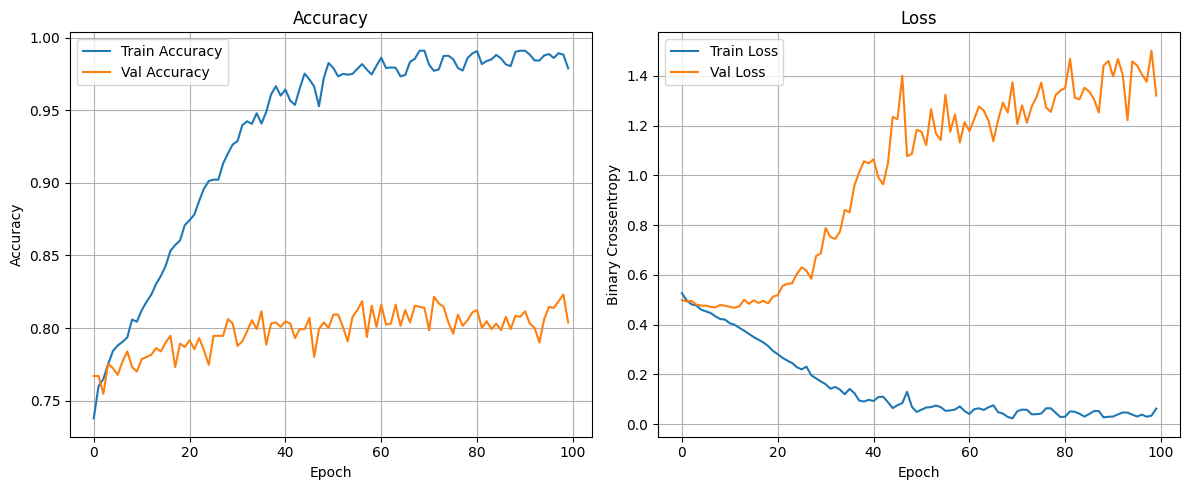

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import time
wine = fetch_ucirepo(id=186)
X = wine.data.features
y = wine.data.targets.values.ravel()

y_binary = (y >= 6).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

start = time.time()

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

end = time.time()

print(f"Czas wykonania: {end - start} sekund")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


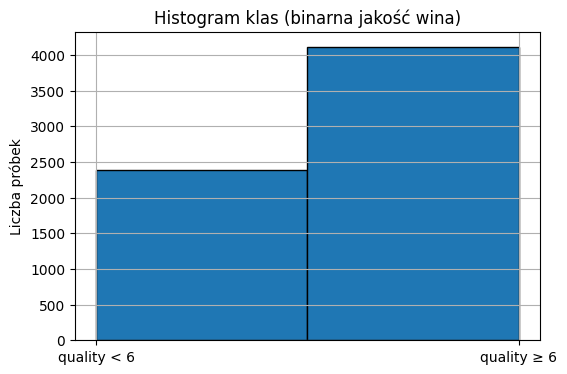

In [18]:
plt.figure(figsize=(6, 4))
plt.hist(y_binary, bins=2, edgecolor='k')
plt.xticks([0, 1], ['quality < 6', 'quality ≥ 6'])
plt.title('Histogram klas (binarna jakość wina)')
plt.ylabel('Liczba próbek')
plt.grid(True)
plt.show()


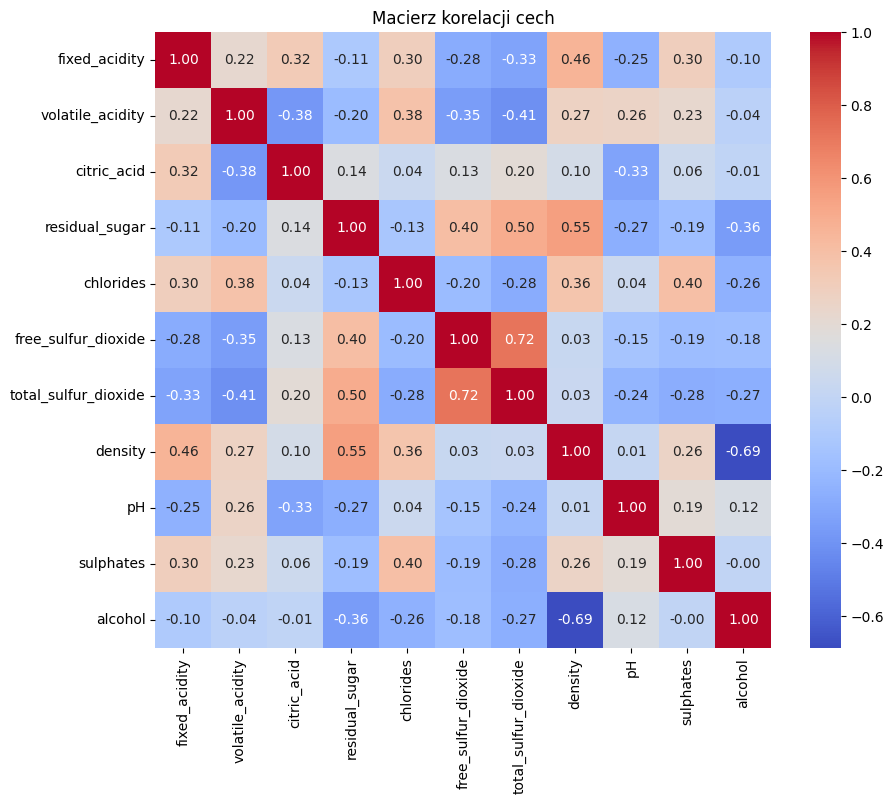

In [19]:
import seaborn as sns

plt.figure(figsize=(10, 8))
corr_matrix = pd.DataFrame(X).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Macierz korelacji cech")
plt.show()


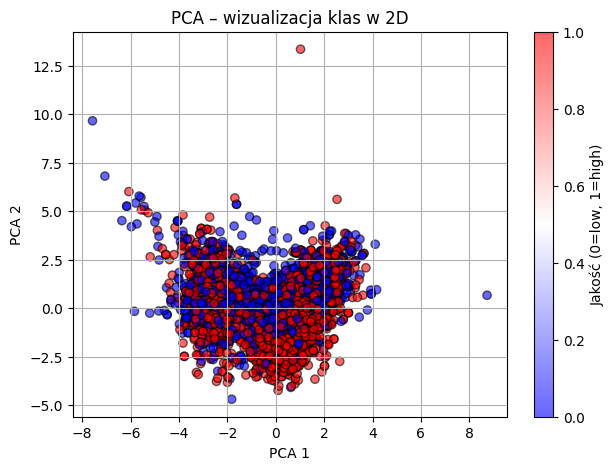

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(7, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='bwr', alpha=0.6, edgecolors='k')
plt.title('PCA – wizualizacja klas w 2D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.colorbar(label='Jakość (0=low, 1=high)')
plt.show()


Jak widac, nasze dwie klasy bardzo na siebie nachodza, informuje nas to, ze klasyfikacja w tym wypadku bedzie trudna

# 1. Uproszczenie modelu

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6732 - loss: 0.6129 - val_accuracy: 0.7269 - val_loss: 0.5293
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7564 - loss: 0.5118 - val_accuracy: 0.7423 - val_loss: 0.5130
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7701 - loss: 0.4954 - val_accuracy: 0.7446 - val_loss: 0.5025
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7625 - loss: 0.5028 - val_accuracy: 0.7569 - val_loss: 0.4976
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7646 - loss: 0.4988 - val_accuracy: 0.7500 - val_loss: 0.4972
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7720 - loss: 0.4854 - val_accuracy: 0.7554 - val_loss: 0.4932
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7737 - loss: 0.4829 - val_accuracy: 0.7615 - val_loss: 0.4899
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7745 - loss: 0.4746 - val_accu

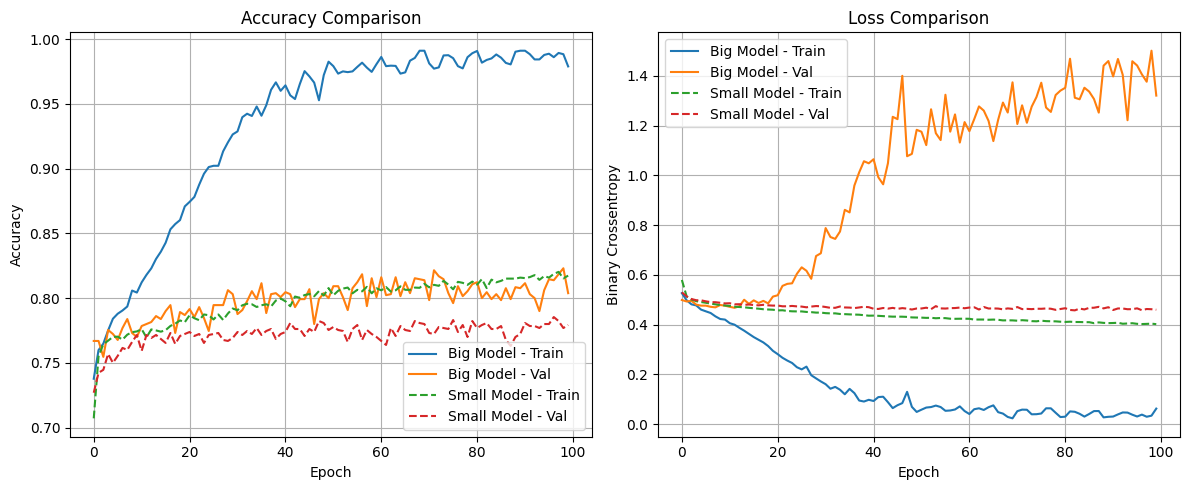

In [11]:
small_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

small_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

start = time.time()


small_history = small_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

end = time.time()

print(f"Czas wykonania: {end - start} sekund")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Big Model - Train')
plt.plot(history.history['val_accuracy'], label='Big Model - Val')
plt.plot(small_history.history['accuracy'], label='Small Model - Train', linestyle='--')
plt.plot(small_history.history['val_accuracy'], label='Small Model - Val', linestyle='--')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Big Model - Train')
plt.plot(history.history['val_loss'], label='Big Model - Val')
plt.plot(small_history.history['loss'], label='Small Model - Train', linestyle='--')
plt.plot(small_history.history['val_loss'], label='Small Model - Val', linestyle='--')
plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Ocena
Z powyszego wykresu mozna wnioskowac, ze uproszczenie modelu pomoglo z generalizacja modelu, wykresy strat dla danych testowych i danych walidacyjnych prwaie sie pokrywaja, co jest znacznym plusem

## Uwaga
Z powyzszych wykresow wynika rowniez ze model osiagnal *gorsza* dokladnosc niz poprzedni przeuczony. Jednakze brak przeuczenia jest dobrym krokiem do ulepszania naszego modelu.

# 2. Dropout

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6803 - loss: 0.5872 - val_accuracy: 0.7554 - val_loss: 0.4979
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7561 - loss: 0.5190 - val_accuracy: 0.7400 - val_loss: 0.5033
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7428 - loss: 0.5201 - val_accuracy: 0.7415 - val_loss: 0.4995
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7513 - loss: 0.5088 - val_accuracy: 0.7531 - val_loss: 0.4903
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7620 - loss: 0.4966 - val_accuracy: 0.7700 - val_loss: 0.4911
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7547 - loss: 0.5049 - val_accuracy: 0.7615 - val_loss: 0.4814
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7593 - loss: 0.5026 - val_accuracy: 0.7623 - val_loss: 0.4846
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7608 - loss: 0.4891 - va

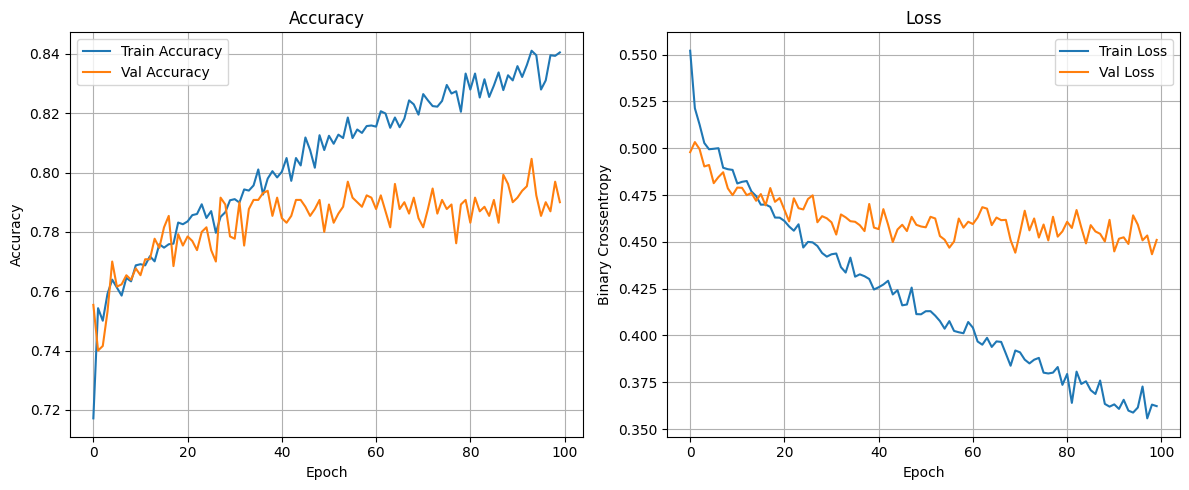

In [12]:

from tensorflow.keras.layers import Dropout

dropout_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

dropout_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

start = time.time()

dropout_history = dropout_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

end = time.time()

print(f"Czas wykonania: {end - start} sekund")

def plot_accuracy_and_loss(history, title):
  plt.figure(figsize=(12, 5))

  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label='Train Accuracy')
  plt.plot(history.history['val_accuracy'], label='Val Accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)

  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label='Train Loss')
  plt.plot(history.history['val_loss'], label='Val Loss')
  plt.title('Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary Crossentropy')
  plt.legend()
  plt.grid(True)

  plt.tight_layout()
  plt.show()

plot_accuracy_and_loss(dropout_history, 'Dropout Model')

Zastosowanie metody Dropout, ktora opiera sie na wylaczaniu neuronow podczas treningu bardzo poprawilo nasz model. Skutecznosc na zbiorze walidacyjnym jest bardzo podobna do sieci bez droupoutu, lecz po wykresie straty widzimy znaczną poprawę, dropout bardzo zmniejszył nam przeuczenie, co oznacza że będzie on dobrym parametrem do wprowadzenia w końcowej sieci.

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7140 - loss: 1.0177 - val_accuracy: 0.7523 - val_loss: 0.6900
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7634 - loss: 0.6655 - val_accuracy: 0.7585 - val_loss: 0.6106
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7609 - loss: 0.5884 - val_accuracy: 0.7715 - val_loss: 0.5646
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7521 - loss: 0.5638 - val_accuracy: 0.7685 - val_loss: 0.5439
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7628 - loss: 0.5414 - val_accuracy: 0.7546 - val_loss: 0.5335
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7769 - loss: 0.5180 - val_accuracy: 0.7546 - val_loss: 0.5361
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7657 - loss: 0.5177 - val_accuracy: 0.7685 - val_loss: 0.5084
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7645 - loss: 0.5171 - val_acc

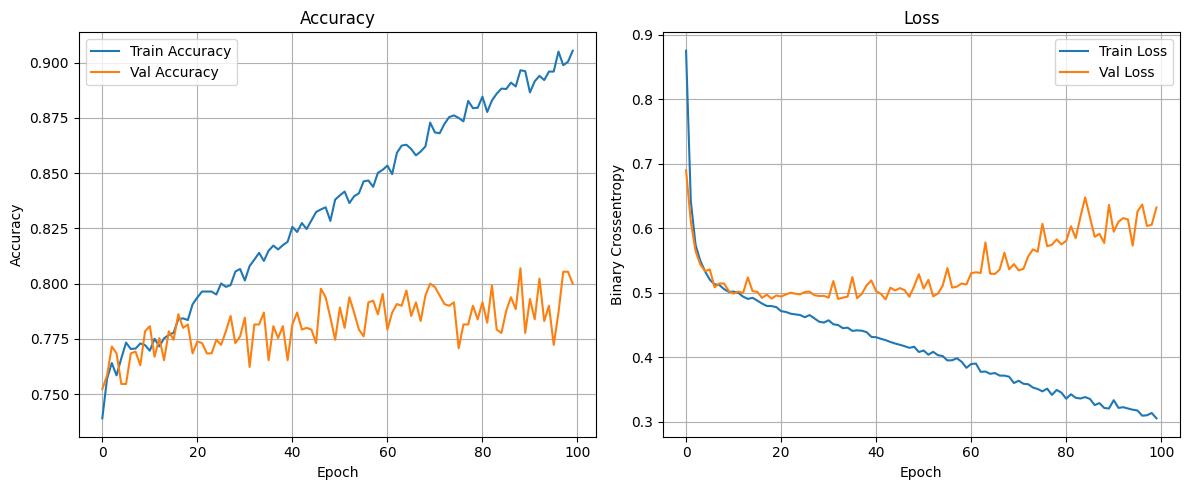

In [13]:
from tensorflow.keras.regularizers import l2

l2_model = Sequential([
    Dense(512, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

start = time.time()

l2_history = l2_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

end = time.time()

print(f"Czas wykonania: {end - start} sekund")
plot_accuracy_and_loss(l2_history, 'L2 Regularization Model')

L2 niestety w tym wypadku wypadla slabo...

POTENCJALNIE dzieje sie tak dlatego że l1 jest duzo bardziej brutalna niz l2, czyli l1 jest w stanie wycinac cale cechy ktore uznaje za niewartosciowe, i ktore moga negatywnie wplywac na uczenie sie modelu. l2 nie zeruje wag a zmniejsza je, co tutaj moze prowadzic do niesatysfakcjonujacego wyniku.

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6804 - loss: 5.1969 - val_accuracy: 0.7362 - val_loss: 0.7043
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7500 - loss: 0.6672 - val_accuracy: 0.7331 - val_loss: 0.6214
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7483 - loss: 0.6187 - val_accuracy: 0.7454 - val_loss: 0.5919
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7545 - loss: 0.6009 - val_accuracy: 0.7485 - val_loss: 0.5845
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7524 - loss: 0.5937 - val_accuracy: 0.7500 - val_loss: 0.5722
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7661 - loss: 0.5750 - val_accuracy: 0.7462 - val_loss: 0.5734
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7550 - loss: 0.5719 - val_accuracy: 0.7523 - val_loss: 0.5629
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7580 - loss: 0.5655 - val_ac

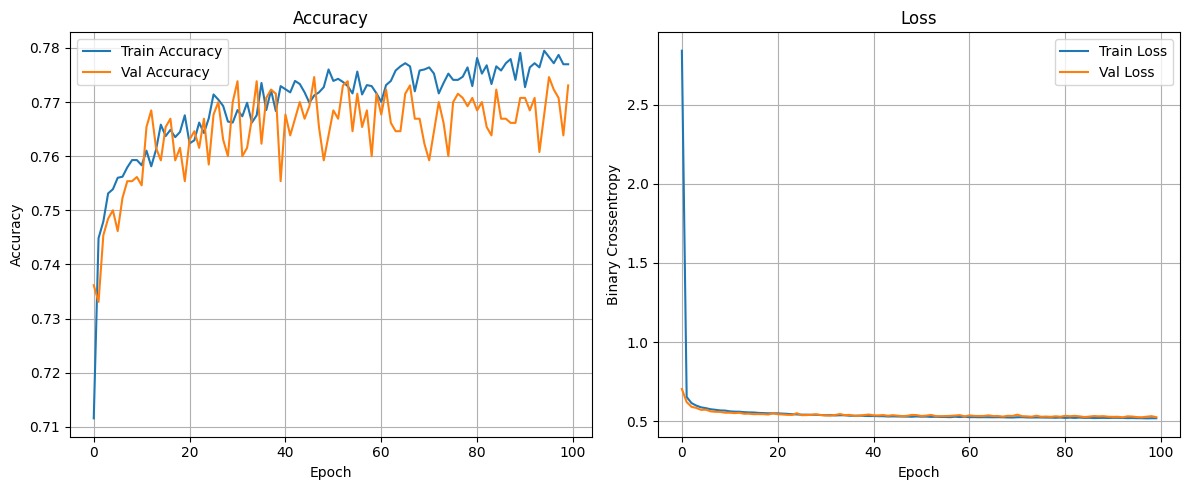

In [14]:
from tensorflow.keras.regularizers import l1

l1_model = Sequential([
    Dense(512, activation='relu', kernel_regularizer=l1(0.001), input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu', kernel_regularizer=l1(0.001)),
    Dense(128, activation='relu', kernel_regularizer=l1(0.001)),
    Dense(64, activation='relu', kernel_regularizer=l1(0.001)),
    Dense(1, activation='sigmoid')
])

l1_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
start = time.time()
l1_history = l1_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

end = time.time()

print(f"Czas wykonania: {end - start} sekund")


plot_accuracy_and_loss(l1_history, 'L1 Regularization Model')

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7208 - loss: 0.5466 - val_accuracy: 0.7469 - val_loss: 0.5052
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7595 - loss: 0.4960 - val_accuracy: 0.7585 - val_loss: 0.4885
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7683 - loss: 0.4774 - val_accuracy: 0.7700 - val_loss: 0.4808
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7787 - loss: 0.4822 - val_accuracy: 0.7646 - val_loss: 0.4874
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7727 - loss: 0.4740 - val_accuracy: 0.7738 - val_loss: 0.4843
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7872 - loss: 0.4523 - val_accuracy: 0.7769 - val_loss: 0.4715
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7971 - loss: 0.4343 - val_accuracy: 0.7700 - val_loss: 0.4703
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7922 - loss: 0.4423 - val_acc

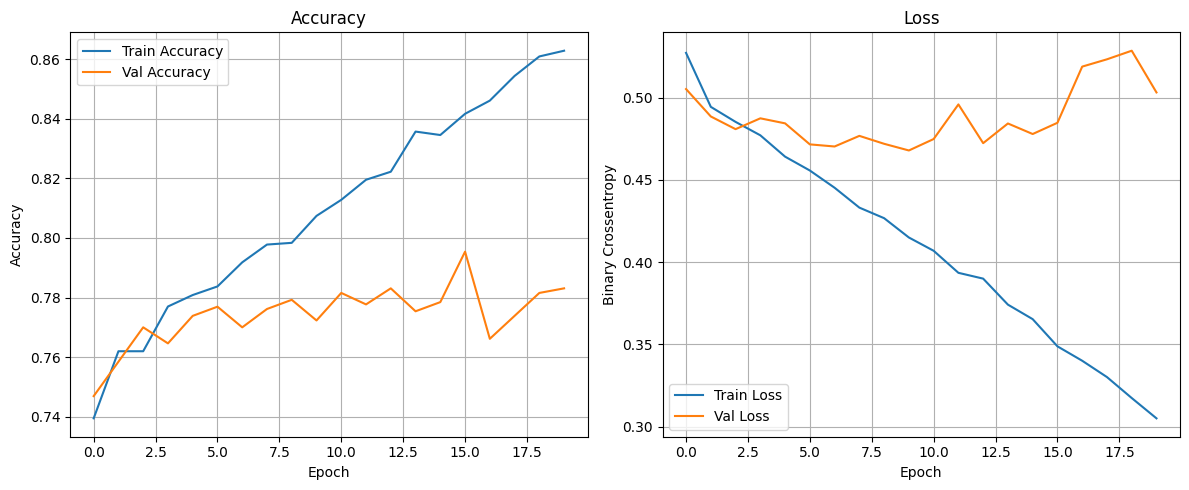

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

early_stop_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

start = time.time()

early_history = early_stop_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

end = time.time()

print(f"Czas wykonania: {end - start} sekund")

plot_accuracy_and_loss(early_history, 'Early Stopping Model')

Niestety sam early stopping to za malo zeby zapobiec przeuczaniu, jest to jednak swietna technika do laczenia z innymi

In [30]:
import time

combined_model = Sequential([
    Dense(512, activation='relu', kernel_regularizer=l1(0.001), input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer=l1(0.001)),
    Dropout(0.4),
    Dense(128, activation='relu', kernel_regularizer=l1(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

combined_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
start = time.time()
combined_history = combined_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
    verbose=1
)
end = time.time()

print(f"Czas wykonania: {end - start} sekund")
plot_accuracy_and_loss(combined_history, 'Combined Model')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


AttributeError: 'str' object has no attribute 'get'

Pomimo że model bez żadnych metod regularizacji osiągnął najwyższy wynik na zbiorze walidacyjnym, jego duża rozbieżność między dokładnością treningową a walidacyjną świadczyła o przeuczeniu.
Metody takie jak Dropout, L1/L2 regularizacja oraz EarlyStopping znacząco ograniczyły overfitting kosztem nieznacznego spadku dokładności.
W praktyce modele regularizowane mogą być bardziej niezawodne przy generalizacji na nowe dane.

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    confusion_matrix, classification_report, precision_recall_curve,
    roc_curve, auc, RocCurveDisplay, PrecisionRecallDisplay
)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [25]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracies = []

for train_index, val_index in skf.split(X_train_scaled, y_train):
    X_cv_train, X_cv_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_cv_train, y_cv_val = y_train[train_index], y_train[val_index]

    model_cv = Sequential([
        Dense(512, activation='relu', kernel_regularizer=l1(0.001), input_shape=(X_train_scaled.shape[1],)),
        Dropout(0.5),
        Dense(256, activation='relu', kernel_regularizer=l1(0.001)),
        Dropout(0.4),
        Dense(128, activation='relu', kernel_regularizer=l1(0.001)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model_cv.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
    model_cv.fit(X_cv_train, y_cv_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_test_scaled, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

    score = model_cv.evaluate(X_cv_val, y_cv_val, verbose=0)
    cv_accuracies.append(score[1])

print(f"Cross-validation accuracies: {cv_accuracies}")
print(f"Mean CV accuracy: {np.mean(cv_accuracies):.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


Cross-validation accuracies: [0.762499988079071, 0.7480769157409668, 0.7632339000701904, 0.7401347160339355, 0.7536092400550842]
Mean CV accuracy: 0.7535


Z cross validation wynika ze model generalizuje calkiem niezle, nie ma duzego rozrzutu pomiedzy danymi.

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


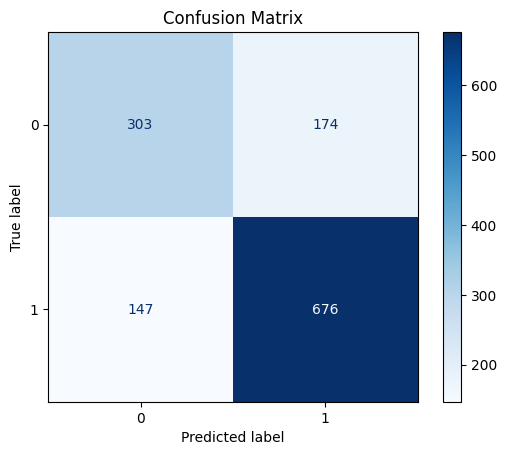

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.64      0.65       477
           1       0.80      0.82      0.81       823

    accuracy                           0.75      1300
   macro avg       0.73      0.73      0.73      1300
weighted avg       0.75      0.75      0.75      1300



In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = combined_model.predict(X_test_scaled)
y_pred_labels = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred_labels))


Model osiągnął 75% skuteczności, jednak analiza metryk klasyfikacyjnych pokazuje, że lepiej radzi sobie z klasą oznaczającą wyższą jakość wina. Klasa o niższej jakości (0) charakteryzuje się niższą precyzją i recall, co oznacza, że model ma tendencję do ich mylenia z klasą 1. Może to wynikać z niewyraźnej separacji klas oraz większej liczby przykładów klasy 1.

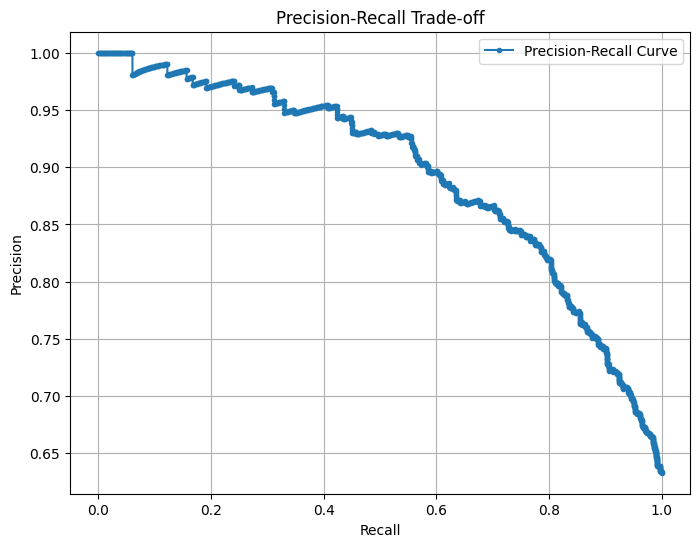

In [28]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Trade-off')
plt.grid(True)
plt.legend()
plt.show()


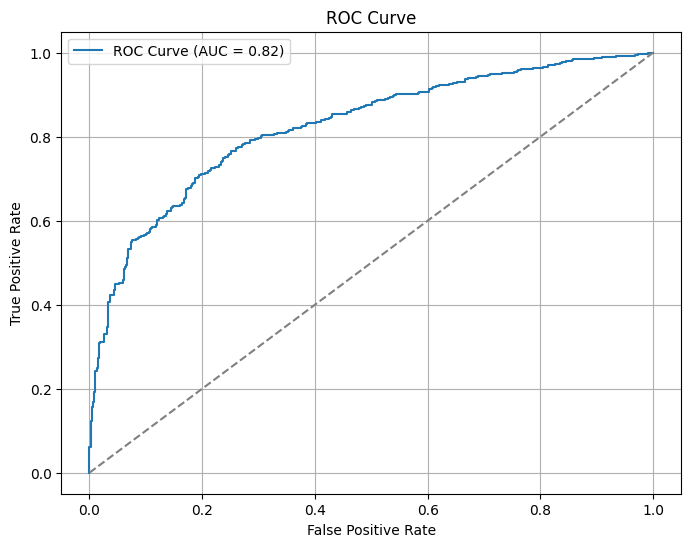

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()
